# 1. Introducción

En este notebook nos centraremos en la **carga, limpieza y exploración** de los datos que utilizaremos para el análisis de maniobras de conducción. 

Contamos con datos de 5 conductores, y cada uno dispone de 5 ficheros Excel que corresponden a las siguientes maniobras:

- **STISIMData_3step-Turnings** (Giro en tres pasos)

- **STISIMData_Overtaking** (Adelantamiento)

- **STISIMData_Stopping** (Detención)

- **STISIMData_Turnings** (Giro convencional)

- **STISIMData_U-Turnings** (Giro en U)

El objetivo de este notebook es preparar y entender el dataset mediante los siguientes pasos:

- **Carga de datos:** Leer los ficheros Excel y estructurarlos.

- **Selección de columnas relevantes:** Nos centraremos en las señales básicas, tales como *Speed, RPM, Steering Wheel Angle, Gas Pedal, Brake Pedal, Clutch Pedal, Gear* y la columna *Maneuver marker flag*.

- **Limpieza de datos:** Identificar y gestionar valores nulos o inconsistencias, y descartar columnas innecesarias.

- **Análisis exploratorio:** Realizar visualizaciones y estadísticas descriptivas que nos permitan entender la distribución y características de los datos.

Este preprocesamiento es fundamental para preparar la información que se utilizará en el siguiente Notebook, donde implementaremos la segmentación temporal y el modelado para la detección de maniobras.

In [1]:
# Install the required packages
%pip install pandas numpy matplotlib seaborn openpyxl

# Importación de las librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración básica para gráficos en línea
%matplotlib inline

# Opcional: Configurar el estilo de los gráficos
sns.set(style='whitegrid')

Note: you may need to restart the kernel to use updated packages.


# 2. Carga de Datos

En esta sección realizamos la lectura de los ficheros Excel con los datos de las maniobras de conducción. 
La estructura de carpetas es la siguiente:

- La carpeta `data/` contiene 5 subcarpetas, cada una llamada `DriverX` (con X de 1 a 5).

- Dentro de cada carpeta de `DriverX`, se encuentran 5 ficheros Excel, uno por cada maniobra:

  - STISIMData_3step-Turnings.xlsx

  - STISIMData_Overtaking.xlsx

  - STISIMData_Stopping.xlsx

  - STISIMData_Turnings.xlsx

  - STISIMData_U-Turnings.xlsx

En este notebook, combinaremos todos esos ficheros en un único DataFrame de pandas, añadiendo columnas para identificar el **conductor** y la **maniobra**. Así podremos trabajar de forma unificada y filtrar por conductor o maniobra cuando sea necesario.

In [2]:
import os
import pandas as pd

# Directorio base donde se encuentran las carpetas de cada conductor
data_path = "./data"  # Ajusta esta ruta según tu ubicación real

# Lista de nombres de ficheros que esperas encontrar en cada carpeta de Driver
filenames = [
    "STISIMData_3step-Turnings.xlsx",
    "STISIMData_Overtaking.xlsx",
    "STISIMData_Stopping.xlsx",
    "STISIMData_Turnings.xlsx",
    "STISIMData_U-Turnings.xlsx",
]

# Lista para almacenar los DataFrames de cada fichero
dfs = []

# Recorremos cada carpeta en 'data' (Driver1, Driver2, etc.)
for driver_folder in os.listdir(data_path):
    driver_path = os.path.join(data_path, driver_folder)

    # Verificamos que sea una carpeta (para descartar archivos sueltos)
    if os.path.isdir(driver_path):
        # Recorremos la lista de ficheros esperados
        for file in filenames:
            file_path = os.path.join(driver_path, file)

            # Comprobamos que el fichero exista antes de intentar leerlo
            if os.path.exists(file_path):
                # Leemos el archivo Excel
                try:
                    df = pd.read_excel(file_path)

                    # Añadimos columnas para identificar el conductor y la maniobra
                    df["Driver"] = driver_folder
                    # Extraemos el nombre de la maniobra a partir del nombre del fichero, sin la extensión
                    maneuver_name = os.path.splitext(file)[0]
                    df["Maneuver"] = maneuver_name

                    # Almacenamos en la lista
                    dfs.append(df)
                except Exception as e:
                    print(f"Error al leer {file_path}: {e}")
            else:
                print(f"Archivo no encontrado: {file_path}")

# Concatenamos todos los DataFrames en uno solo
if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)
    print(
        f"Datos combinados: {combined_df.shape[0]} filas y {combined_df.shape[1]} columnas."
    )
else:
    combined_df = pd.DataFrame()
    print("No se encontraron datos para combinar.")

# Vemos las primeras filas para verificar la carga
combined_df.head()

Datos combinados: 214786 filas y 25 columnas.


,Elapsed time,Long Dist,Lat Pos,Steering wheel angle,Throttle input,Brake pedal force,Gas pedal,Brake pedal,Clutch pedal,Left turn,...,Maneuver marker flag,Accidents,Collisions,Peds Hit,Speeding Tics,Red Lgt Tics,Speed Exceed,Stop Sign Ticks,Driver,Maneuver
0,0.100,0.00,2.17,-8.24,0.0,1.36,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Driver1,STISIMData_3step-Turnings
1,0.152,0.01,2.17,-8.24,0.0,1.36,0,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Driver1,STISIMData_3step-Turnings
2,0.204,0.01,2.17,-8.24,0.0,1.36,0,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Driver1,STISIMData_3step-Turnings
3,0.254,0.01,2.17,-8.24,0.0,1.36,0,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Driver1,STISIMData_3step-Turnings
4,0.304,0.01,2.17,-8.24,0.0,1.36,0,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Driver1,STISIMData_3step-Turnings


Este bloque de código realiza lo siguiente:

- Recorre cada carpeta en el directorio `data` (cada carpeta representa un conductor).

- Dentro de cada carpeta, lee los 5 ficheros Excel especificados.

- Añade columnas `Driver` y `Maneuver` para identificar de dónde provienen los datos.

- Combina todos los DataFrames en uno solo para facilitar el análisis posterior.

# 3. Selección de Columnas Relevantes

El enunciado indica que, para la práctica, se deben utilizar únicamente aquellas señales que sean esenciales para detectar las maniobras de conducción. En concreto, se opta por conservar las siguientes columnas:

- **Speed (Velocidad):** Es una variable fundamental que indica cómo varía la velocidad del vehículo en cada instante. Es crucial para detectar aceleraciones o desaceleraciones durante una maniobra.

- **RPM (Revoluciones por minuto):** Proporciona información sobre el régimen del motor, lo cual puede estar relacionado con los cambios de marcha y la aceleración.

- **Steering Wheel Angle (Ángulo del volante):** Indica la dirección en la que se mueve el volante y, por tanto, es clave para identificar maniobras de giro.

- **Gas Pedal (Pedal del acelerador):** Permite saber cuándo y cuánto se está acelerando, lo que es importante para distinguir acciones como adelantamientos o aceleraciones durante maniobras.

- **Brake Pedal (Pedal del freno):** Mide la acción del freno ejercida por el vehículo, lo que ayuda a identificar paradas o desaceleraciones bruscas. Se diferencia del "Brake Pedal Force", que se usa en otros contextos, pero en nuestros datos, las simulaciones se han realizado en entornos sin pendientes, por lo que el valor de Brake Pedal es suficiente.

- **Clutch Pedal (Pedal del embrague):** Es útil para detectar el momento en que se realizan cambios de marcha, ya que su activación suele preceder a la modificación en la marcha.

- **Gear (Marcha):** Indica la marcha en la que se encuentra el vehículo. Se debe prestar especial atención a que, en ocasiones, durante los cambios de marcha se registra un valor 0 (indicando punto muerto), pero esto se interpreta como una transición entre marchas (por ejemplo, de 3ª a 2ª).

- **Maneuver marker flag:** Esta columna es esencial, ya que marca con un 1 cuando se está realizando la maniobra correspondiente y con un 0 cuando no lo está, permitiendo segmentar el tiempo en el que la acción tiene lugar.

Por otro lado, se omiten o se dejan de lado otras columnas presentes en los ficheros (por ejemplo: Long Dist, Lat Pos, Throttle input, etc.), ya que no aportan información relevante para el reconocimiento de maniobras. Además, se descartan las columnas **Left turn** y **Right turn**, ya que según el enunciado no deben utilizarse para la detección de maniobras de giro.

Esta selección permite centrar el análisis únicamente en las variables que aportan información directa sobre la dinámica del vehículo y el comportamiento del conductor, facilitando así el preprocesamiento y la posterior identificación de patrones en las maniobras.

In [3]:
# Lista de columnas relevantes según el enunciado
relevant_columns = [
    "speed",
    "RPM",
    "Steering wheel angle",
    "Gas pedal",
    "Brake pedal",
    "Clutch pedal",
    "Gear",
    "Maneuver marker flag",
    "Driver",  # Añadida en la carga para identificar el conductor
    "Maneuver",  # Añadida en la carga para identificar la maniobra
]

# Verificamos qué columnas tiene nuestro DataFrame
print("Columnas originales:", combined_df.columns.tolist())

# Seleccionamos únicamente las columnas relevantes
df_relevant = combined_df[relevant_columns].copy()

# Mostramos las primeras filas del DataFrame filtrado
df_relevant.head()

Columnas originales: ['Elapsed time', 'Long Dist', 'Lat Pos', 'Steering wheel angle', 'Throttle input', 'Brake pedal force', 'Gas pedal', 'Brake pedal', 'Clutch pedal', 'Left turn', 'Right turn', 'Gear', 'speed', 'RPM', 'Hand wheel torque', 'Maneuver marker flag', 'Accidents', 'Collisions', 'Peds Hit', 'Speeding Tics', 'Red Lgt Tics', 'Speed Exceed', 'Stop Sign Ticks', 'Driver', 'Maneuver']


,speed,RPM,Steering wheel angle,Gas pedal,Brake pedal,Clutch pedal,Gear,Maneuver marker flag,Driver,Maneuver
0,0.06,147.244,-8.24,0,0,0,0,0,Driver1,STISIMData_3step-Turnings
1,0.04,184.118,-8.24,0,0,0,0,0,Driver1,STISIMData_3step-Turnings
2,0.02,219.193,-8.24,0,0,0,0,0,Driver1,STISIMData_3step-Turnings
3,0.00,252.554,-8.24,0,0,0,0,0,Driver1,STISIMData_3step-Turnings
4,0.00,284.287,-8.24,0,0,0,0,0,Driver1,STISIMData_3step-Turnings


- Se crea una lista `relevant_columns` que contiene las columnas esenciales que necesitamos para la práctica.

- Se imprime la lista de columnas originales para verificar que se dispone de las esperadas.

- Se filtra el DataFrame `combined_df` para obtener `df_relevant`, que contendrá solo las columnas de interés.

- Se utiliza `.copy()` para trabajar con una copia y evitar posibles problemas de referencia.

Con esto se asegura que el análisis posterior se realice únicamente sobre las variables que son realmente útiles para detectar las maniobras de conducción, mientras que las demás se ignoran o se dejan para un posible análisis futuro, pero sin interferir en el objetivo principal.

# 4. Limpieza de Datos

En este apartado preparamos el dataset para el análisis posterior. Recordemos que los datos provienen de un simulador de conducción y se registran 20 veces por segundo, por lo que capturan de forma muy detallada la dinámica del vehículo durante cada maniobra.

Para la limpieza de datos se realizan las siguientes tareas:

- **Gestión de valores nulos o inconsistencias:** Revisamos si existen valores faltantes en las columnas relevantes (Speed, RPM, Steering Wheel angle, Gas Pedal, Brake Pedal, Clutch Pedal, Gear y Maneuver marker flag). Si se encuentran, se rellenarán (por ejemplo, usando la mediana en variables numéricas) para mantener la integridad del análisis.

- **Eliminación o relleno de valores atípicos:** Aunque en otros contextos la eliminación de outliers es importante, en nuestro caso, al tratarse de datos obtenidos en un entorno simulado controlado y considerando que analizaremos las señales en ventanas temporales (overlapping o no overlapping), es fundamental preservar la dinámica completa de la maniobra. Por ejemplo, durante un cambio de marcha es normal que la columna "Gear" tenga valores 0 (indicando punto muerto). Por ello, **no se procede a eliminar outliers de forma sistemática**, ya que podrían eliminar información valiosa sobre la evolución temporal de la maniobra.

- **Cambio de tipos de datos:**  Se verificará que las columnas numéricas estén en el formato adecuado (por ejemplo, convertir de string a float) para asegurar que se puedan realizar cálculos y análisis estadísticos correctamente.

- **Atención especial a la columna "Maneuver marker flag":** Esta columna indica si en un instante se está ejecutando la maniobra (valor 1) o no (valor 0). Es fundamental conservar su integridad para segmentar correctamente las maniobras durante el análisis.

In [4]:
# Revisamos la cantidad de valores nulos en cada columna relevante
print("Valores nulos por columna:")
print(df_relevant.isnull().sum())

# Verificamos la columna "Maneuver marker flag" para asegurarnos de que sus valores sean correctos
print(
    "\nValores únicos en 'Maneuver marker flag':",
    df_relevant["Maneuver marker flag"].unique(),
)

# Convertir "Maneuver marker flag" a entero para asegurar que sus valores sean 0 o 1
df_relevant["Maneuver marker flag"] = df_relevant["Maneuver marker flag"].astype(int)

# Lista de columnas numéricas que vamos a limpiar
numeric_columns = [
    "speed",
    "RPM",
    "Steering wheel angle",
    "Gas pedal",
    "Brake pedal",
    "Clutch pedal",
    "Gear",
]

# Rellenamos valores nulos en las columnas numéricas con la mediana
for col in numeric_columns:
    if df_relevant[col].isnull().sum() > 0:
        median_val = df_relevant[col].median()
        df_relevant[col].fillna(median_val, inplace=True)
        print(
            f"Se han rellenado los valores nulos de '{col}' con la mediana: {median_val}"
        )

# Convertir las columnas numéricas al tipo float, en caso de que no estén en ese formato
df_relevant[numeric_columns] = df_relevant[numeric_columns].apply(
    pd.to_numeric, errors="coerce"
)

# Nota sobre outliers:
# Dado que los datos provienen de un simulador controlado y se capturan a 20 Hz,
# queremos preservar la dinámica completa de las maniobras, incluyendo transiciones como los cambios de marcha (donde 'Gear' puede tener valor 0 temporalmente).
# Por ello, en este caso decidimos **no eliminar outliers** de forma sistemática.

# Visualizamos estadísticas descriptivas para confirmar la limpieza y los rangos de las variables
print("\nEstadísticas descriptivas:")
df_relevant.describe()

Valores nulos por columna:
speed                   0
RPM                     0
Steering wheel angle    0
Gas pedal               0
Brake pedal             0
Clutch pedal            0
Gear                    0
Maneuver marker flag    0
Driver                  0
Maneuver                0
dtype: int64

Valores únicos en 'Maneuver marker flag': [0 1]

Estadísticas descriptivas:


,speed,RPM,Steering wheel angle,Gas pedal,Brake pedal,Clutch pedal,Gear,Maneuver marker flag
count,214786.000000,214786.000000,214786.000000,214786.000000,214786.000000,214786.000000,214786.000000,214786.000000
mean,39.139595,1719.369731,-15.900188,21876.383032,1183.550068,16663.000945,2.007561,0.426792
std,24.744569,826.875877,137.556076,19099.255713,3847.683374,24628.566533,1.283520,0.494613
min,0.000000,0.000000,-525.300000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,18.040000,1021.638750,-4.120000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,41.190000,1683.556000,-1.020000,22400.000000,0.000000,321.000000,2.000000,0.000000
75%,59.780000,2193.941750,1.020000,36947.000000,0.000000,25378.000000,3.000000,1.000000
max,106.380000,4774.648000,430.520000,64253.000000,45892.000000,64253.000000,6.000000,1.000000


1. **Valores nulos:**
    - Se revisa cada columna para detectar valores faltantes y, si se encontraran, se rellenarían usando la mediana (lo cual es adecuado para preservar la distribución de los datos).

2. **Conversión de tipos:**
    - Se asegura que todas las columnas numéricas estén en formato float, lo que es esencial para realizar cálculos precisos.

3. **Outliers:**
    - Dado que se analizarán las variables en los rangos exactos en los que el conductor ejecuta la maniobra (utilizando ventanas temporales), eliminar outliers podría borrar información relevante, especialmente en transiciones como cambios de marcha (donde es normal ver valores 0 en “Gear”).
    
    - Por ello, se opta por no eliminar outliers de forma sistemática.

4. **Maneuver marker flag:**
    - Se verifica que esta columna contenga únicamente 0 y 1 y se asegura su formato entero, ya que es crucial para identificar los momentos en que se ejecuta la maniobra.

Con estos pasos, se prepara el dataset para las fases posteriores, manteniendo toda la información necesaria para analizar la dinámica de las maniobras.

# 5. Discretización / Normalización

Dado que los datos se capturan cada 1/20 segundos en un entorno simulado, es crucial conservar la dinámica completa de la maniobra. En lugar de escalar las señales a un rango fijo (por ejemplo, 0 a 1), optamos por discretizarlas para reflejar la tendencia de cada variable a lo largo del tiempo.

Nuestro criterio es el siguiente:
- **Speed, RPM y Steering Wheel angle:** Calculamos la diferencia entre el valor actual y el anterior. Si la diferencia es positiva, asignamos +1 (la señal aumenta); si es negativa, -1 (disminuye); y si es cero, 0 (se mantiene).

- **Gas Pedal y Brake Pedal:** Se aplica el mismo criterio de diferencia para determinar la tendencia. Además, si se observa el valor máximo (por ejemplo, 1, indicando que el pedal está completamente presionado), se conserva ese comportamiento.

- **Clutch Pedal:** Es una variable binaria (0 o 1) que se mantiene sin cambios.

- **Gear (Marcha):** Durante un cambio de marcha es normal que aparezcan instantes con valor 0 (indicando punto muerto) entre dos valores diferentes (por ejemplo, de 3 a 2). Para capturar la verdadera tendencia, definimos una función que ignore estos 0 intermedios y compare el valor actual con el último valor distinto de 0, de modo que se considere correctamente si la marcha está aumentando o disminuyendo.

Esta transformación en valores discretos (o "tendencias") nos permitirá analizar la evolución de las maniobras a través de ventanas temporales, preservando la información dinámica sin perder detalles importantes en las transiciones (como los cambios de marcha).

In [5]:
# Para las señales "Speed", "RPM" y "Steering Wheel angle" usamos la diferencia entre muestras consecutivas.
df_relevant["Speed_trend"] = (
    df_relevant["speed"].diff().apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
)
df_relevant["RPM_trend"] = (
    df_relevant["RPM"].diff().apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
)
df_relevant["Steering_trend"] = (
    df_relevant["Steering wheel angle"]
    .diff()
    .apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
)

# Para "Gas Pedal" y "Brake Pedal", aplicamos un criterio similar.
df_relevant["Gas_trend"] = (
    df_relevant["Gas pedal"]
    .diff()
    .apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
)
df_relevant["Brake_trend"] = (
    df_relevant["Brake pedal"]
    .diff()
    .apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
)

# La señal "Clutch Pedal" se conserva, ya que es binaria.
df_relevant["Clutch_trend"] = df_relevant["Clutch pedal"]


# Para la señal "Gear", definimos una función personalizada que tenga en cuenta que
# durante un cambio de marcha pueden aparecer instantes con valor 0 (punto muerto) intermedios.
def compute_gear_trend(gear_series):
    trend = []
    prev = None  # Almacena el último valor distinto de 0
    for val in gear_series:
        if prev is None:
            trend.append(0)
            if val != 0:
                prev = val
        else:
            if val == 0:
                # El 0 intermedio se considera parte de la transición, sin modificar la tendencia.
                trend.append(0)
            else:
                # Comparamos con el último valor no cero.
                if val > prev:
                    trend.append(1)
                elif val < prev:
                    trend.append(-1)
                else:
                    trend.append(0)
                prev = val
    return trend


df_relevant["Gear_trend"] = compute_gear_trend(df_relevant["Gear"])

# Visualizamos algunas filas para confirmar la discretización.
df_relevant[
    [
        "speed",
        "Speed_trend",
        "RPM",
        "RPM_trend",
        "Steering wheel angle",
        "Steering_trend",
        "Gas pedal",
        "Gas_trend",
        "Brake pedal",
        "Brake_trend",
        "Gear",
        "Gear_trend",
    ]
].head(10)

,speed,Speed_trend,RPM,RPM_trend,Steering wheel angle,Steering_trend,Gas pedal,Gas_trend,Brake pedal,Brake_trend,Gear,Gear_trend
0,0.06,0,147.244,0,-8.24,0,0,0,0,0,0,0
1,0.04,-1,184.118,1,-8.24,0,0,0,0,0,0,0
2,0.02,-1,219.193,1,-8.24,0,0,0,0,0,0,0
3,0.00,-1,252.554,1,-8.24,0,0,0,0,0,0,0
4,0.00,0,284.287,1,-8.24,0,0,0,0,0,0,0
5,0.00,0,314.470,1,-8.24,0,0,0,0,0,0,0
6,0.00,0,343.179,1,-8.24,0,0,0,0,0,0,0
7,0.00,0,370.486,1,-7.20,1,0,0,0,0,0,0
8,0.00,0,396.460,1,-8.24,-1,0,0,0,0,0,0
9,0.00,0,425.960,1,-8.24,0,0,0,0,0,0,0


1. **Señales de Speed, RPM y Steering Wheel angle:**
    - Se calcula la diferencia entre cada muestra y la anterior usando `.diff()`.

    - Con una función lambda, se asigna +1 si la señal aumenta, -1 si disminuye y 0 si se mantiene constante.

2. **Gas Pedal y Brake Pedal:**
    - Se utiliza el mismo enfoque para capturar la tendencia en la presión de los pedales.

3. **Clutch Pedal:**
    - Dado que ya es binaria, se copia directamente.

4. **Gear:**
    - Se define `compute_gear_trend`, que recorre la serie de marchas.

    - Durante un cambio de marcha, si se encuentra un valor 0 (indicando punto muerto), se asigna 0 pero se mantiene el último valor no cero para comparar con futuros valores.
    
    - De este modo, se determina correctamente la tendencia (incremento o decremento) ignorando los 0 intermedios que son parte de la transición.

5. **Visualización:**
    - Se muestran las primeras 10 filas de las columnas originales junto con las columnas de tendencia para comprobar que la discretización se realizó correctamente.

# 6. Análisis Exploratorio Inicial

En esta sección realizamos un análisis exploratorio básico del dataset para obtener una primera impresión de la distribución y las relaciones entre las variables relevantes.

Se incluyen:
- Visualizaciones básicas, como histogramas de las señales principales (Speed, RPM, Steering Wheel angle, Gas Pedal, Brake Pedal, Clutch Pedal y Gear).

- Estadísticas descriptivas (media, desviación estándar, valores mínimo y máximo, entre otros).

- Visualización de correlaciones sencillas entre variables mediante una matriz de correlación (heatmap) y, opcionalmente, un pairplot.

Este análisis nos ayudará a entender la distribución de los datos y a identificar posibles relaciones que puedan ser relevantes para la detección de maniobras.

Estadísticas descriptivas:
               speed            RPM  Steering wheel angle      Gas pedal  \
count  214786.000000  214786.000000         214786.000000  214786.000000   
mean       39.139595    1719.369731            -15.900188   21876.383032   
std        24.744569     826.875877            137.556076   19099.255713   
min         0.000000       0.000000           -525.300000       0.000000   
25%        18.040000    1021.638750             -4.120000       0.000000   
50%        41.190000    1683.556000             -1.020000   22400.000000   
75%        59.780000    2193.941750              1.020000   36947.000000   
max       106.380000    4774.648000            430.520000   64253.000000   

         Brake pedal   Clutch pedal           Gear  
count  214786.000000  214786.000000  214786.000000  
mean     1183.550068   16663.000945       2.007561  
std      3847.683374   24628.566533       1.283520  
min         0.000000       0.000000      -1.000000  
25%         0.000000   

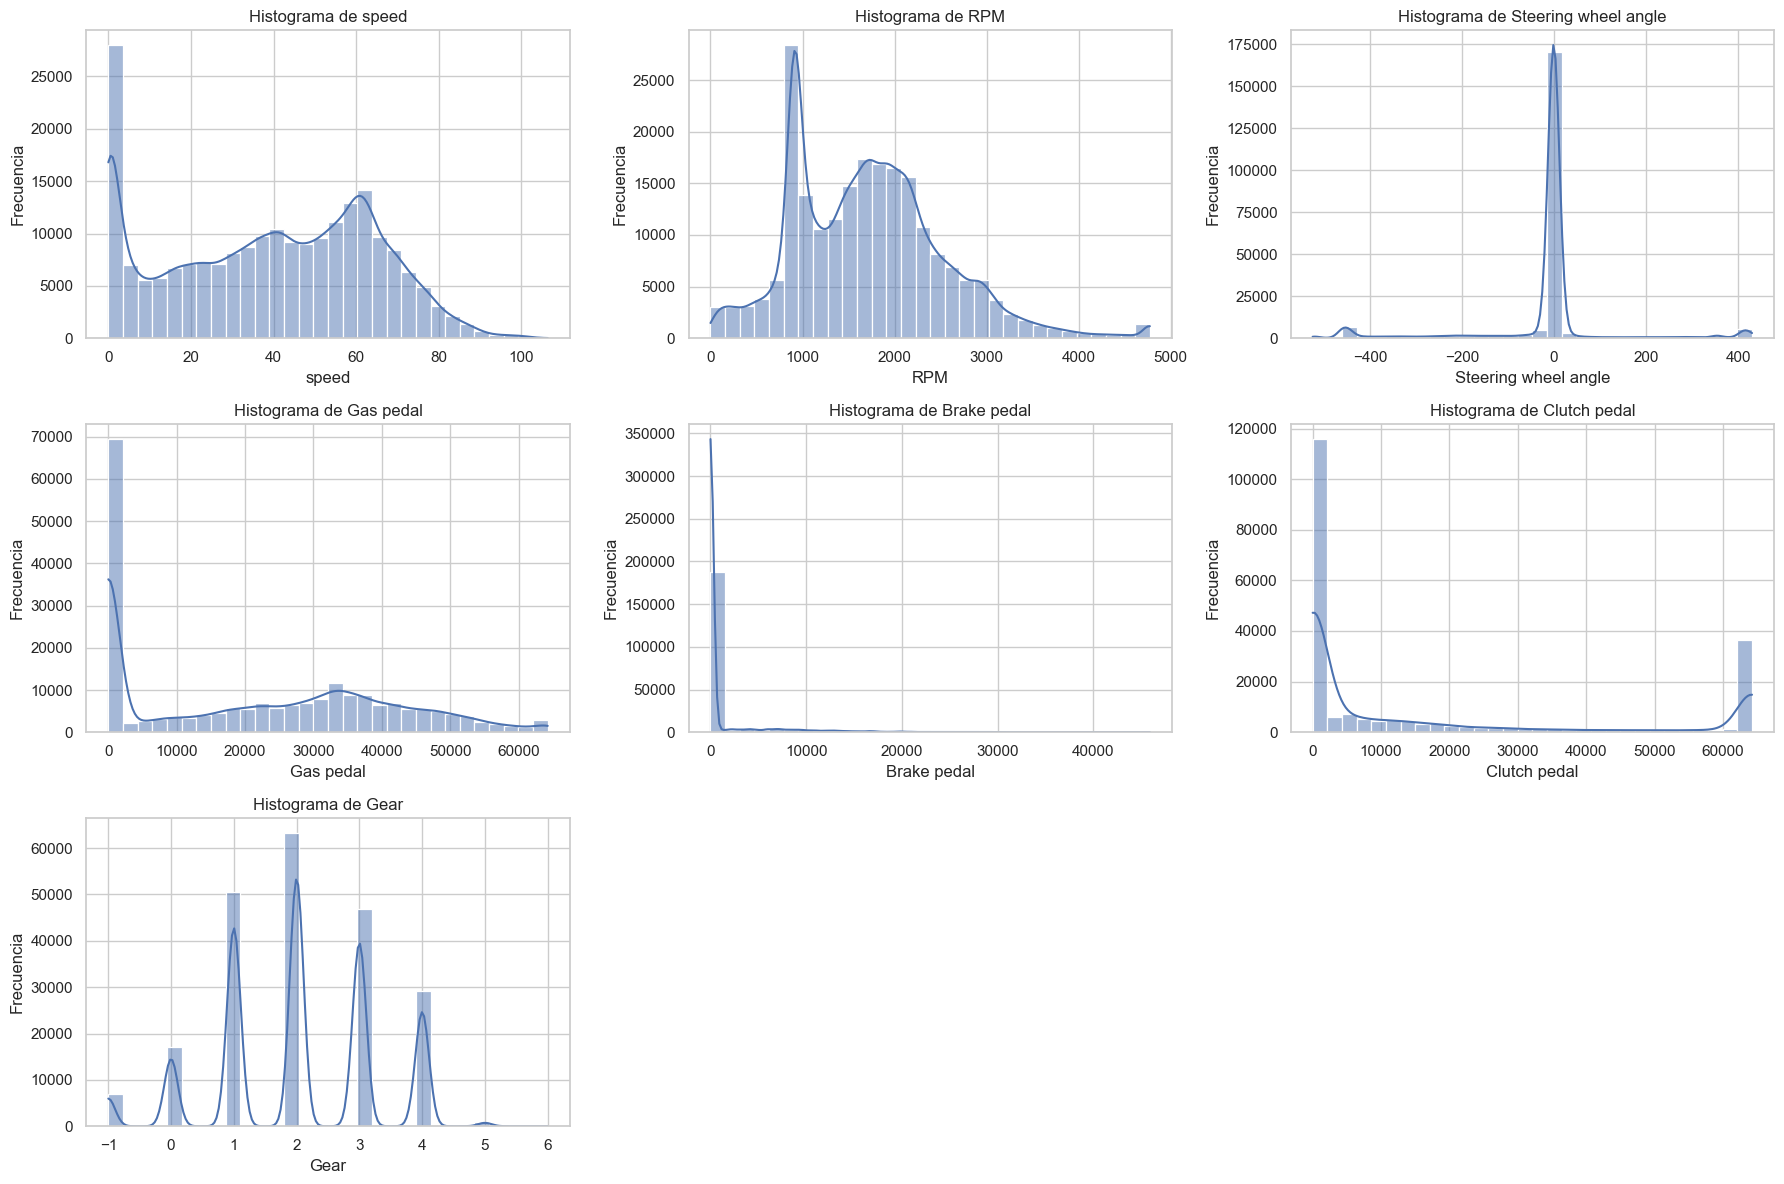

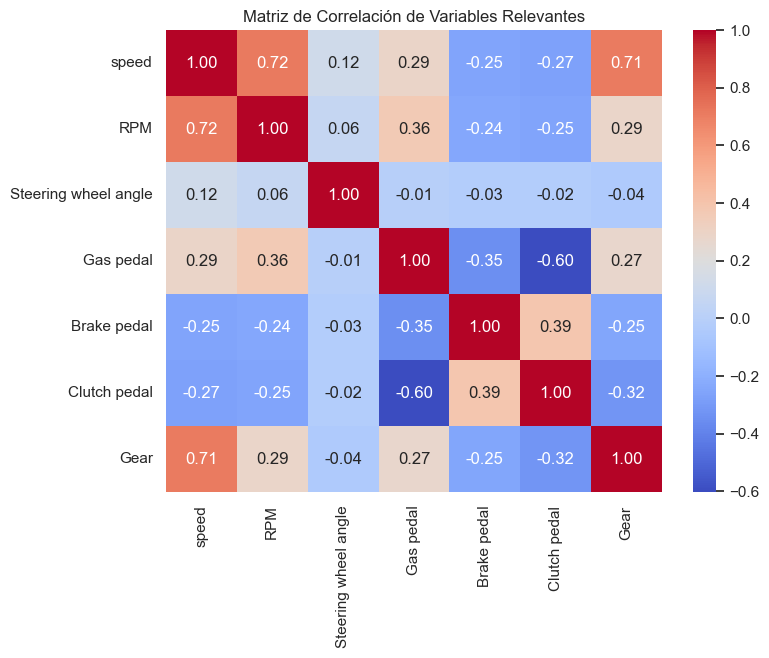

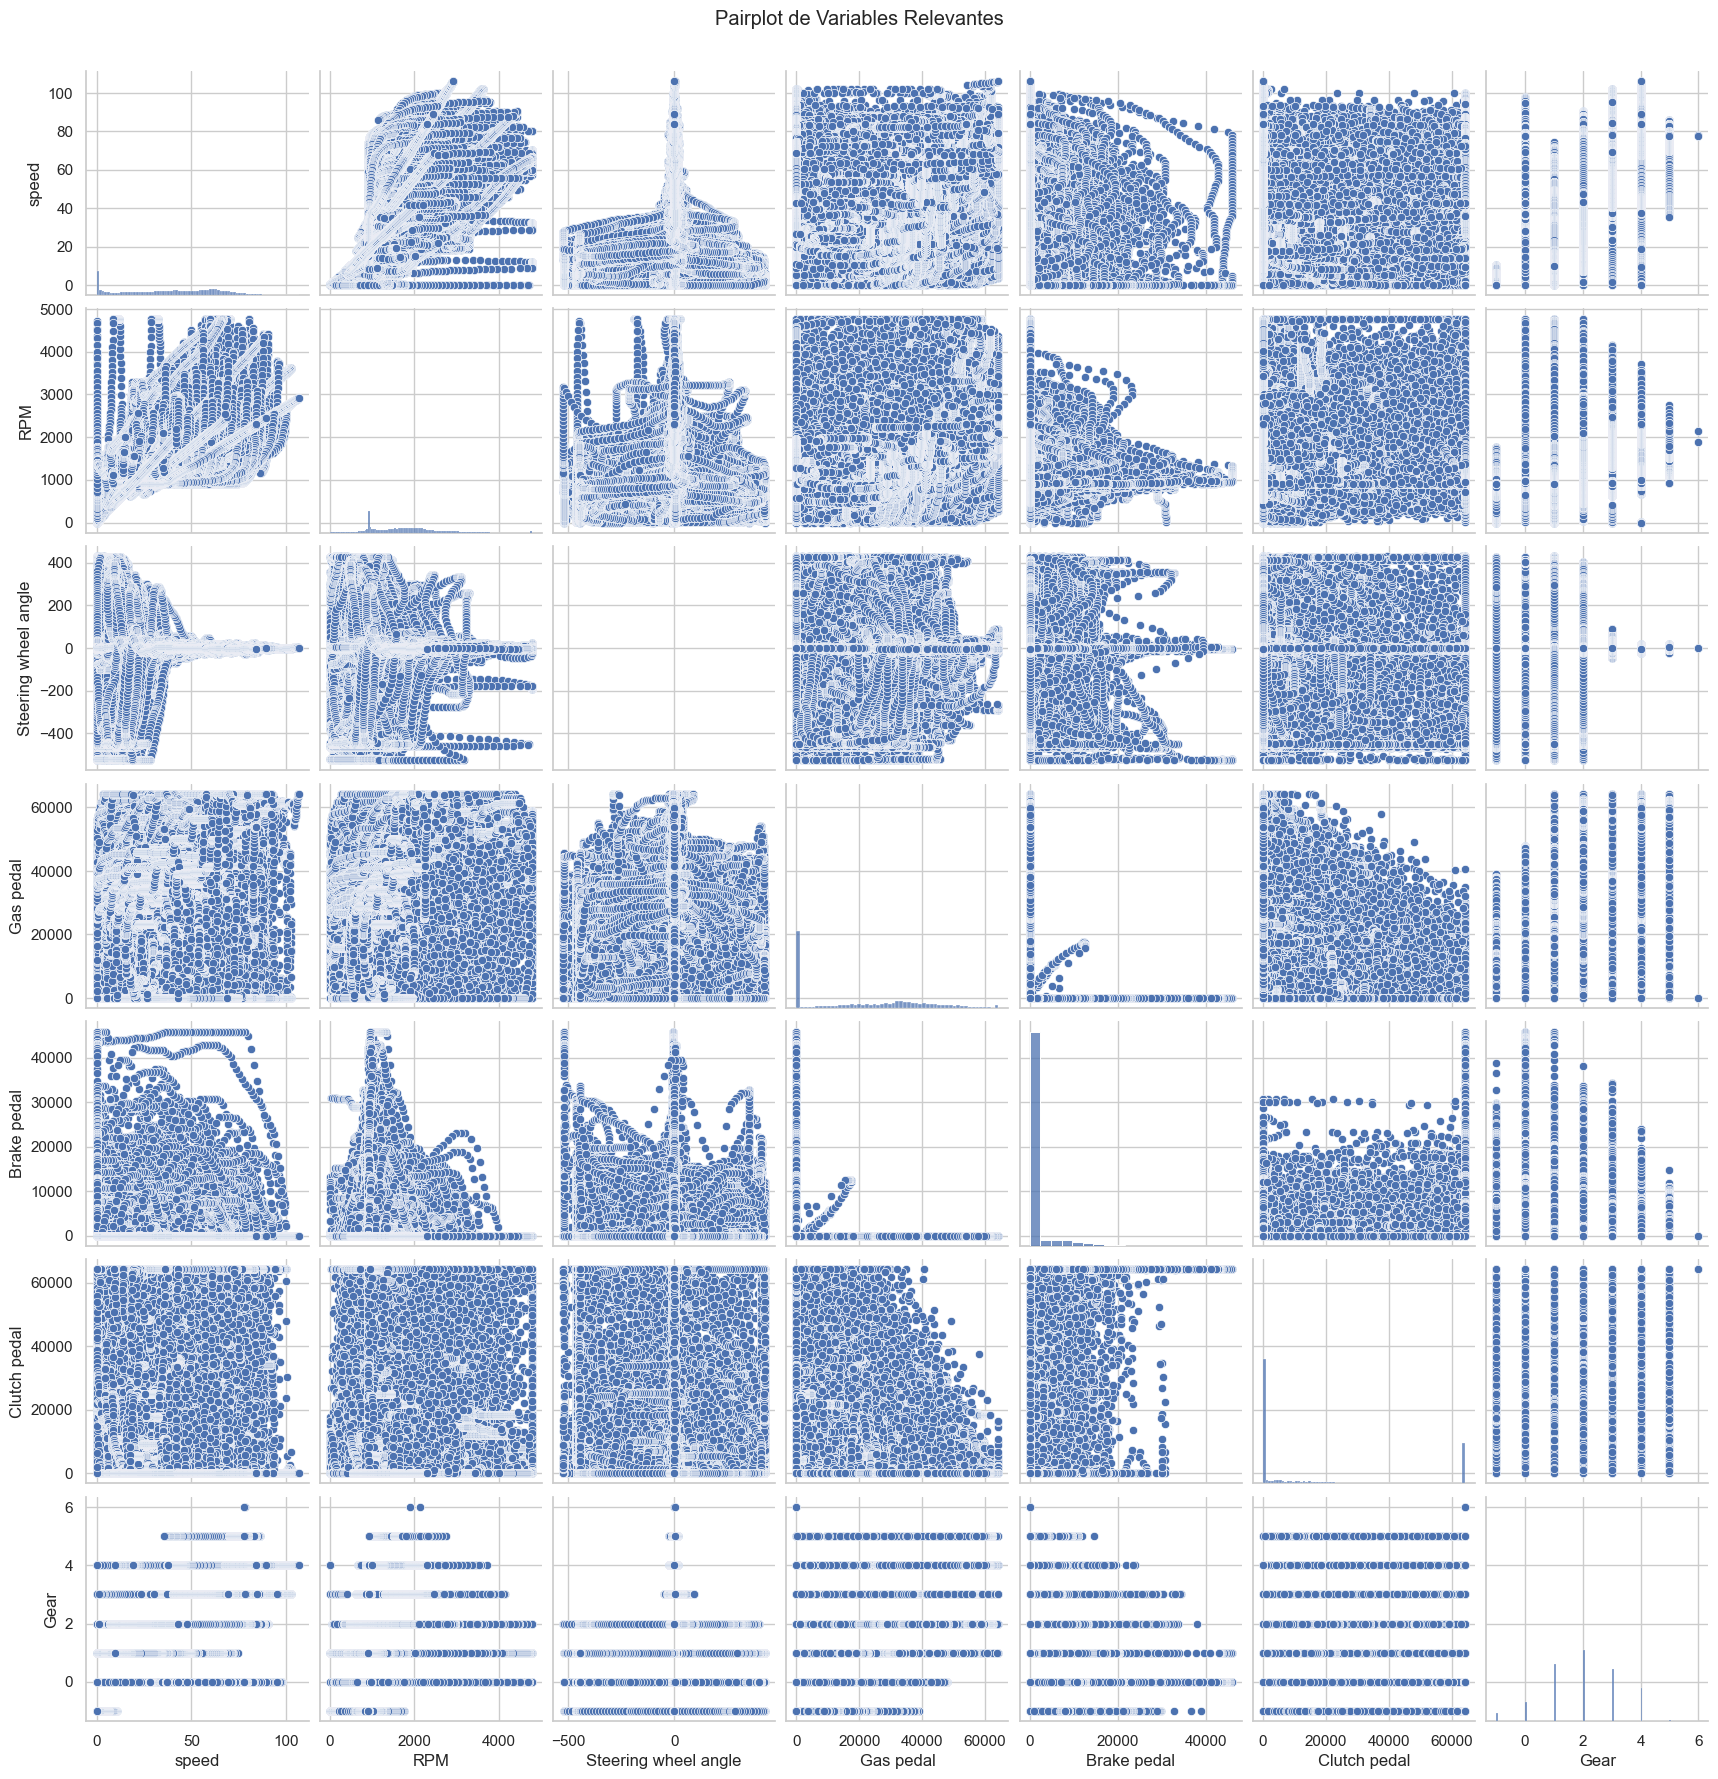

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# TODO - VER CON QUE NOS QUEDAMOS DE ESTO

# 1. Estadísticas descriptivas de las variables relevantes
print("Estadísticas descriptivas:")
print(
    df_relevant[
        [
            "speed",
            "RPM",
            "Steering wheel angle",
            "Gas pedal",
            "Brake pedal",
            "Clutch pedal",
            "Gear",
        ]
    ].describe()
)

# 2. Histogramas de las variables relevantes
variables = [
    "speed",
    "RPM",
    "Steering wheel angle",
    "Gas pedal",
    "Brake pedal",
    "Clutch pedal",
    "Gear",
]
plt.figure(figsize=(18, 12))
for i, var in enumerate(variables):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_relevant[var], bins=30, kde=True)
    plt.title(f"Histograma de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# 3. Matriz de correlación de las variables relevantes
corr_matrix = df_relevant[variables].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación de Variables Relevantes")
plt.show()

# 4. Pairplot opcional para visualizar relaciones entre variables
sns.pairplot(df_relevant[variables])
plt.suptitle("Pairplot de Variables Relevantes", y=1.02)
plt.show()

1. **Estadísticas Descriptivas:** Se muestran las estadísticas básicas (media, desviación estándar, mínimos, máximos, percentiles, etc.) de las variables seleccionadas. Esto permite tener una idea inicial de la distribución y de posibles escalas diferentes entre las variables.

2. **Histogramas:** Se crean histogramas para cada variable relevante, usando `sns.histplot` con la opción `kde=True` para incluir la densidad estimada. Esto ayuda a visualizar la distribución de cada variable (por ejemplo, si la distribución es simétrica, sesgada, etc.).

3. **Matriz de Correlación:** Se calcula la matriz de correlación para las variables relevantes y se visualiza con un heatmap. Esto permite identificar relaciones lineales entre las variables, lo que puede ser útil para comprender la interacción entre ellas en el contexto de las maniobras.

4. **Pairplot (Opcional):** Se utiliza `sns.pairplot` para obtener una vista global de las relaciones bivariadas entre todas las variables. Es especialmente útil para detectar patrones o agrupamientos que puedan influir en el análisis posterior.

# 7. Conclusiones Parciales

En este notebook hemos llevado a cabo los siguientes pasos clave:

- **Carga de datos:** 
  
  Se han leído y combinado los ficheros Excel de los 5 conductores, añadiendo columnas para identificar el *Driver* y la *Maniobra*. Esto nos ha permitido consolidar toda la información en un único DataFrame, facilitando el análisis posterior.

- **Selección de columnas relevantes:** 
  
  Se han seleccionado las variables esenciales para la detección de maniobras, es decir: *Speed, RPM, Steering Wheel angle, Gas Pedal, Brake Pedal, Clutch Pedal, Gear* y *Maneuver marker flag*. Las demás columnas se han descartado (o dejado aparte) para evitar introducir ruido en el análisis.

- **Limpieza de datos:** 
  
  Se ha gestionado la presencia de valores nulos, rellenando las columnas numéricas con la mediana, y se han convertido las variables al formato numérico adecuado (float). Además, se ha verificado que la columna *Maneuver marker flag* contenga únicamente 0 o 1, ya que es fundamental para identificar cuándo se ejecuta una maniobra.  
  
  Dado que los datos provienen de un simulador controlado y se capturan a 20 Hz, se decidió no eliminar outliers de forma sistemática, ya que podrían contener información relevante sobre la dinámica (por ejemplo, durante los cambios de marcha, donde es normal encontrar valores 0 que indican punto muerto).

- **Discretización / Normalización:** 
  
  Se han transformado las señales en "tendencias" mediante la diferencia entre muestras consecutivas:
  
  - Para *Speed, RPM* y *Steering Wheel angle*, se asigna +1 si la señal aumenta, -1 si disminuye y 0 si se mantiene.
  
  - Para *Gas Pedal* y *Brake Pedal*, se aplica un criterio similar, considerando además la preservación de los valores máximos (por ejemplo, 1).
  
  - *Clutch Pedal* se mantiene en su forma binaria.
  
  - Para *Gear*, se ha implementado una función personalizada que ignora los valores 0 intermedios (que representan punto muerto durante los cambios de marcha) y compara el valor actual con el último valor distinto de 0, para reflejar correctamente la tendencia.
  
Estas transformaciones nos permitirán, en el siguiente notebook, segmentar temporalmente los datos (ya sea con ventanas solapadas o no) y desarrollar el modelado para detectar las maniobras de conducción.

**Siguiente Paso:**  

  En el *Notebook 2* aplicaremos la segmentación temporal y el modelado basado en las transformaciones realizadas aquí, para extraer las características temporales y detectar las maniobras de conducción.